# Analysis of Developmental Language Data Using Multiple Regression
![](images/Hoff_Naigles_2002_table5.png)


# Linear Relationships


One of the most basic things a researcher is interested in is seeing whether there is any relationship between variables. Here, we will look at data from Nettle (1998).

<img src="images/Nettle_1998_abstract.png" width="700" height="700" />



## Data

Nettle recorded:

1. the *number of languages* 
1. the *area* (in km<sup>2</sup>) 
1. the *population* 
1. the *mean growing season* (MGS, in months) 
1. the number of weather stations measuring MGS
1. the standard deviation of the measurements of MGS from the different weather stations in each country.

In [2]:
from os import chdir as cd
import pandas as pd

#pathin = '/Users/ethan/Documents/GitHub/ethanweed.github.io/python-tutorials/data/'
#file = 'nettle_1998.csv'

#cd(pathin)
url = 'https://raw.githubusercontent.com/ethanweed/ethanweed.github.io/master/python-tutorials/data/nettle_1998.csv'
df = pd.read_csv(url, sep = ';')

# make a pandas "dataframe" from the .csv file. The file uses semicolons to separate the columns.
#df = pd.read_csv(file, sep = ';')

# Nettle reports the population data in 1000's, probably to save room in the data table, 
#but that is an unusual number to think about population in, so let's convert to millions. 
#While we're at it, let's convert km2 to millions, so that the number doesn't appear in scientific notation 
#on the x-axis
df['Population'] = df['Population']*1000/1000000
df['Area'] = df['Area']/1000000

# look at the first lines of the dataframe
df.head()

,Country,Languages,Area,Population,Stations,MGS,GS_SD,Variable_GS,Used_in_1996
0,Algeria,18,2.381741,25.660,102,6.60,2.29,Y,N
1,Angola,42,1.246700,10.303,50,6.22,1.87,N,N
2,Australia,234,7.713364,17.336,134,6.00,4.17,Y,N
3,Bangladesh,37,0.143998,118.745,20,7.40,0.73,N,N
4,Benin,52,0.112622,4.889,7,7.14,0.99,N,Y



## Plotting Correlations
- We can use seaborn to see if there is any clear relationship between these variables. 

- Is there a relationship countries' *area* and their *number of languages spoken*?  

- We can use the ``sns.regplot`` function to take a quick look.

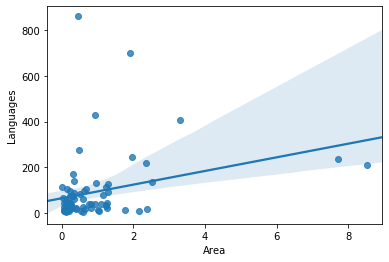

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

sns.regplot(x = "Area", y = "Languages", data = df)

There does seem to be some sort of relationship here, but it is difficult to see on the plot. A few countries are outliers, and they are pushing all the other data down into the lower-left corner. By transforming the data to a logarithmic scale, we can stretch them out a bit, and make them easier to see. Let's add two more columns to the dataframe, with log-transformed versions of the Population and Area data:

In [4]:
df['Population_log'] = np.log(df['Population'])
df['Area_log'] = np.log(df['Area'])
df['Languages_log'] = np.log(df['Languages'])
df.tail()

,Country,Languages,Area,Population,Stations,MGS,GS_SD,Variable_GS,Used_in_1996,Population_log,Area_log,Languages_log
69,Vietnam,88,0.331689,68.183,40,8.80,1.59,N,N,4.222195,-1.103557,4.477337
70,Yemen,6,0.527968,12.302,2,0.00,0.00,N,N,2.509762,-0.638720,1.791759
71,Zaire,219,2.344858,36.672,16,9.44,1.90,N,N,3.602014,0.852225,5.389072
72,Zambia,38,0.752618,8.780,30,5.43,0.67,N,N,2.172476,-0.284197,3.637586
73,Zimbabwe,18,0.390759,10.019,52,5.29,1.43,N,N,2.304483,-0.939664,2.890372


Now the relationship is a little easier to see:

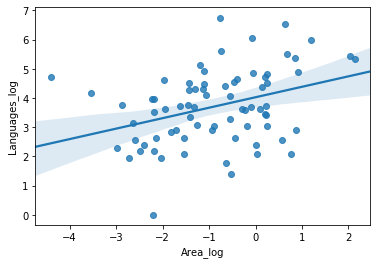

In [5]:
# Plot the log-transformed data
sns.regplot(x = "Area_log", y = "Languages_log", data = df)

In [6]:
import scipy.stats as stats

# create a tuple "res" containing r and p-value for Pearson's correlation
res = stats.pearsonr(df['Area'], df['Languages'])

# round of the output to 5 decimal places
print("r (correlation coefficient): ", round(res[0],5))
print("p-value: ", round(res[1],5))

r (correlation coefficient):  0.2905
p-value:  0.01204


The output tells us that there is a positive correlation between the number of languages and the area of the country. We can see this in the correlation coefficient (cor) which is 0.29. The correlation coefficient is a number between 1 and -1, with 1 indicating a perfect positive correlation, and -1 indicating a perfect negative correlation. The p-value of the correlation indicates how confident we can be in the fit of the model.

## Correlation Matrix

Sometimes it can be useful to look at all the correlations between all of the variables in a dataset at once. This can be done with a correlation matrix. However, we should be careful about reading too much into a correlation matrix: it just tells us how much the variables correlate with each other. In order to be more rigorous about making predictions, we will need to build linear models.

In [7]:
print( df[['Languages','Area', 'Population', 'MGS']].corr())

            Languages      Area  Population       MGS
Languages    1.000000  0.290502    0.408753  0.241796
Area         0.290502  1.000000    0.333082 -0.127708
Population   0.408753  0.333082    1.000000 -0.017172
MGS          0.241796 -0.127708   -0.017172  1.000000


## Modelling a Relationship as a Linear Regression

In the plot above, we used a linear model to draw the line between the points. The straight line in the plot is a linear model, that minimizes the distance between the line and every individual point. 

If we generate some random numbers to create white noise, then the line should be close to horizontal. 

We can test this by generating some white noise data. Here we create a vector of 1000 random numbers between 0 and 100 plotted against 1000 other random numbers between 0 and 100:

In [8]:
from random import seed
from random import randint
seed(42)
x = []
y = []
for _ in range(1000):
    xvalue = randint(0, 100)
    yvalue = randint(0, 100)
    x.append(xvalue)
    y.append(yvalue)

df_random = pd.DataFrame(
    {'x': x,
     'y': y})     

Then we can fit a linear regression model to the data:

Text(0.5, 1.0, 'White Noise')

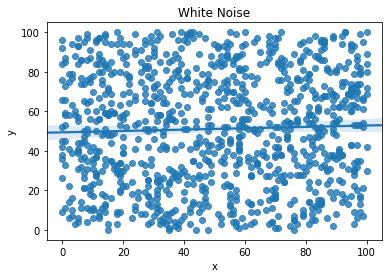

In [9]:
sns.regplot(x = "x", y = "y", data = df_random).set_title('White Noise')

If we were in doubt, our correlation matrix shows us that there is very little correlation between these two vectors of random numbers:

In [10]:
res = stats.pearsonr(df_random['x'], df_random['y'])
print("R (correlation coefficient): ", round(res[0],5))
print("p-value: ", round(res[1],5))

R (correlation coefficient):  0.03547
p-value:  0.26244


If we want to go beyond simply observing the correlation and instead use our linear model to make predictions about new data that we have not yet seen, we need to get the equation for our model's line. 

That will allow us to extend the line in either direction, and make predictions.

The equation of a line is $y=mx+y_0$, where $y_0$ is the point at which the line intercepts the y-axis. 

This is sometimes also written as $y=mx+b$, or $y=ax+b$. These equations are all equivalant. 

The important thing for our purposes is that they define the slope and intercept of a line which represents a *linear model* of the data.

Linear models are *very* useful, and they are all over the place in statistics. In the case of our random, white-noise data, because the slope is nearly equal to zero, the intercept of the model is a very close approximation of the mean of y:

Text(0.5, 1.0, 'White Noise')

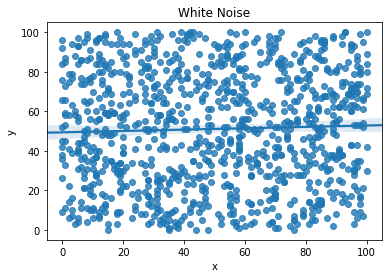

In [11]:
sns.regplot(x = "x", y = "y", data = df_random).set_title('White Noise')

In [12]:
import statsmodels.formula.api as smf
print('Mean of y =', df_random['y'].mean())
mod = smf.ols(formula = 'y ~ x', data = df_random).fit()
mod.summary()

Mean of y = 51.097


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.257
Date:                Wed, 30 Oct 2019   Prob (F-statistic):              0.262
Time:                        11:49:02   Log-Likelihood:                -4771.5
No. Observations:                1000   AIC:                             9547.
Df Residuals:                     998   BIC:                             9557.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     49.3689      1.787     27.627      0.000      45.862      52.876
x              0.0344      0.031      1.121      0.262      -0.026       0.095
==============================================================================
Omnibus:                      576.895   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               57.018
Skew:                          -0.034   Prob(JB):                     4.16e-13
Kurtosis:                       1.832   Cond. No.                         115.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Modelling Number of Languages as a Linear Function of Area

When estimating a linear model, we need to specify a *formula*. In the formula below, the ``~`` means "predicted by", so the formula reads: "Languages *predicted by* Area". ``ols`` stands for "ordinary least squares", which is the method by which the algorithm estimates the equation of the line.

``import statsmodels.formula.api as smf
mod1 = smf.ols(formula = 'Languages ~ Area', data = df).fit()
mod1.summary()``

In [13]:
import statsmodels.formula.api as smf
mod1 = smf.ols(formula = 'Languages ~ Area', data = df).fit()
mod1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Languages   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.072
Method:                 Least Squares   F-statistic:                     6.636
Date:                Wed, 30 Oct 2019   Prob (F-statistic):             0.0120
Time:                        11:49:03   Log-Likelihood:                -469.08
No. Observations:                  74   AIC:                             942.2
Df Residuals:                      72   BIC:                             946.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     63.3707     19.115      3.315      0.001      25.265     101.476
Area          29.9297     11.618      2.576      0.012       6.769      53.090
==============================================================================
Omnibus:                       90.300   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1035.641
Skew:                           3.831   Prob(JB):                    1.30e-225
Kurtosis:                      19.649   Cond. No.                         2.22
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In the data table above, toward the middle, in the column called "coef", we see "Area". This is the regression coefficient, or $B$ (beta). 

But Area isn't the only thing correlated with the number of languages. 

Population size looks like it might also be a relevant factor:

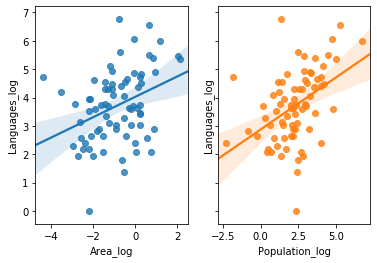

In [14]:
fig, axs = plt.subplots(ncols=2, sharey = True)
sns.regplot(x = "Area_log", y = "Languages_log", data = df, ax=axs[0])
sns.regplot(x = "Population_log", y = "Languages_log", data = df, ax=axs[1])

## Multiple Regression
By adding Population as a second *predictor variable*, we can estimate the relative importance of both Area and Population in predicting the Number of Languages:

In [15]:
mod2 = smf.ols(formula = 'Languages ~ Area + Population', data = df).fit()
mod2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Languages   R-squared:                       0.194
Model:                            OLS   Adj. R-squared:                  0.171
Method:                 Least Squares   F-statistic:                     8.538
Date:                Wed, 30 Oct 2019   Prob (F-statistic):           0.000476
Time:                        11:49:06   Log-Likelihood:                -464.37
No. Observations:                  74   AIC:                             934.7
Df Residuals:                      71   BIC:                             941.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     57.2891     18.168      3.153      0.002      21.063      93.515
Area          17.8871     11.643      1.536      0.129      -5.328      41.102
Population     0.4950      0.159      3.105      0.003       0.177       0.813
==============================================================================
Omnibus:                       99.231   Durbin-Watson:                   2.287
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1553.599
Skew:                           4.241   Prob(JB):                         0.00
Kurtosis:                      23.782   Cond. No.                         135.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Now we can compare the $B$ values for Area and Population. 

We see that Area has a stronger relationship with Language than Population. 

On the other hand, with the introduction of the second predictor variable, Area is no longer a significant predictor. 

Finally, the two together can better account for the variance in the data (adjusted $R^2$ = 0.17) than Area alone (adjusted $R^2$ = 0.072).

### Now we can interpret the relative predictive strength of Input MLU in the data from Hoff & Naigles (2002)

![](images/Hoff_Naigles_2002_table5.png)